# Aufgabe 1 (Time Series & ARIMA)

### 1 Time Series 
Laden Sie die Datei sp500_stocks.csv mit pandas. Untersuchen Sie die ersten Zeilen und Spalten, um sich mit der Struktur der Daten (Datum, Aktienkurse usw.) vertraut zu machen.

In [82]:
import pandas as pd

# Load data
sp500_stocks = pd.read_csv('../../Data/sp500_stocks/sp500_stocks.csv')

# Your code here

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,59.318886,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,58.947342,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,59.783295,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,59.826176,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,60.247749,84.320000,84.320000,83.300003,83.690002,3405800.0
...,...,...,...,...,...,...,...,...
706445,2024-02-05,FE,36.220001,36.220001,36.660000,36.150002,36.410000,3883600.0
706446,2024-02-06,FE,35.810001,35.810001,35.990002,35.630001,35.750000,2636100.0
706447,2024-02-07,FE,35.830002,35.830002,36.040001,35.650002,35.950001,2514300.0
706448,2024-02-08,FE,35.790001,35.790001,35.849998,35.410000,35.619999,4550300.0


### 2 Time Series Grundlagen
Konvertieren Sie die Spalte 'Date' in das datetime-Format und setzen Sie sie als Index des DataFrame. Plotten Sie den Schlusskurs einer ausgewählten Aktie über die Zeit.

In [13]:
# Your code here

### 3 Umgang mit fehlenden Werten
Überprüfen Sie auf fehlende Werte im Datensatz und behandeln Sie diese (Vorwärtsfüllen, Rückwärtsfüllen oder Interpolation).

In [14]:
# Your code here

### 4 Resampling von Time Series
Resampeln Sie die Aktienkure auf eine andere "Frequenz" (z.B. monatliche oder vierteljährliche Durchschnitte).

In [15]:
# Your code here

### 5 Rolling Windows
Berechnen und plotten Sie den rollenden Durchschnitt und die rollende Standardabweichung des Aktienkurses über ein 30-Tage-Fenster.

In [16]:
# Your code here

### 6 Stationarity & Differencing
Erklären Sie Stationarity in Time Series. Verwenden Sie den Augmented Dickey-Fuller-Test, um zu überprüfen, ob eine Reihe stationär ist. Führen Sie eine Differencing durch, um eine Reihe stationär zu machen.

In [17]:
# Your code here

### 7 ACF & PACF (Autocorrelation & Partial Autocorrelation)
Generieren Sie Autokorrelationsfunktion (ACF) und partielle Autokorrelationsfunktion (PACF) Diagramme für die Time Series einer Aktie, um potenzielle ARIMA-Parameter zu identifizieren.

In [18]:
# Your code here

### 8 Einfaches ARIMA-Modell
Erstellen Sie ein einfaches ARIMA-Modell für die Zeitreihe einer einzelnen Aktie. Erklären Sie die Wahl der Parameter (p, d, q) basierend auf den ACF- und PACF-Diagrammen.

In [19]:
# Your code here

### 9 Modell-Diagnose
Bewerten Sie das ARIMA-Modell anhand von Diagnosediagrammen und berechnen Sie Metriken wie AIC, BIC, um die Modellanpassung zu bewerten.

In [20]:
# Your code here

### 10 Auto ARIMA
Nutzen Sie "auto_arima" aus dem "pmdarima" Package um die ARIMA Parameter(p,d,q) automatisch via AIC (Aikake Information Criterion) zu finden.  
Vergleichen Sie die gefundenen p,d,q Parater mit den Analysen der ACF/PACF.

In [21]:
# Your code here

### 11 Prognose mit ARIMA
Verwenden Sie das ARIMA-Modell, um Prognosen zu erstellen. Vergleichen Sie die prognostizierten Werte mit den tatsächlichen Daten mithilfe der Visualisierung.

In [22]:
# Your code here

# Lösungen

In [165]:
import pandas as pd

# Load data and set 'Date' as index column of the Dataframe (needed by Python to interpret the dates correctly)
sp500_stocks = pd.read_csv('../../Data/sp500_stocks/sp500_stocks.csv', index_col='Date',parse_dates=True)

# Display the first few rows to understand the data structure
print(sp500_stocks.head())

           Symbol  Adj Close      Close       High        Low       Open  \
Date                                                                       
2010-01-04    MMM  59.318886  83.019997  83.449997  82.669998  83.089996   
2010-01-05    MMM  58.947342  82.500000  83.230003  81.699997  82.800003   
2010-01-06    MMM  59.783295  83.669998  84.599998  83.510002  83.879997   
2010-01-07    MMM  59.826176  83.730003  83.760002  82.120003  83.320000   
2010-01-08    MMM  60.247749  84.320000  84.320000  83.300003  83.690002   

               Volume  
Date                   
2010-01-04  3043700.0  
2010-01-05  2847000.0  
2010-01-06  5268500.0  
2010-01-07  4470100.0  
2010-01-08  3405800.0  


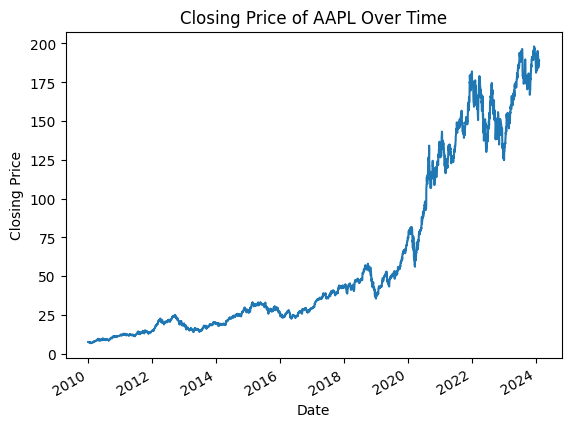

In [209]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with 'Date' parsed as datetime and set as index
sp500_stocks = pd.read_csv('../../Data/sp500_stocks/sp500_stocks.csv', parse_dates=True, index_col='Date')

# Plot the closing price for the stock 'AAPL'
sp500_stocks[sp500_stocks['Symbol'] == 'AAPL']['Close'].plot(title='Closing Price of AAPL Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [210]:
# Check for missing values
print(sp500_stocks.isnull().sum())

# Forward fill missing values as one of the strategies
sp500_stocks_filled = sp500_stocks.ffill()

Symbol           0
Adj Close    26680
Close        26680
High         26680
Low          26680
Open         26680
Volume       26680
dtype: int64


In [211]:
# Filter the DataFrame for 'AAPL' and select only the 'Close' column
aapl_close = sp500_stocks[sp500_stocks['Symbol'] == 'AAPL']['Close']

# Resample to get monthly averages for 'AAPL' and calculate the mean of 'Close' prices
aapl_monthly_averages = aapl_close.resample('M').mean()

# Cut the series, it becomes more handy. In reality this is quite a "hard" discussion
# Take last 10 years
aapl_monthly_averages = aapl_monthly_averages[-120:]

print(aapl_monthly_averages)

# Check the type of 'monthly_averages'. What is different?

Date
2014-03-31     19.043367
2014-04-30     19.324082
2014-05-31     21.542704
2014-06-30     22.971361
2014-07-31     23.906477
                 ...    
2023-10-31    174.668638
2023-11-30    185.879523
2023-12-31    194.308501
2024-01-31    187.724284
2024-02-29    188.038574
Freq: M, Name: Close, Length: 120, dtype: float64


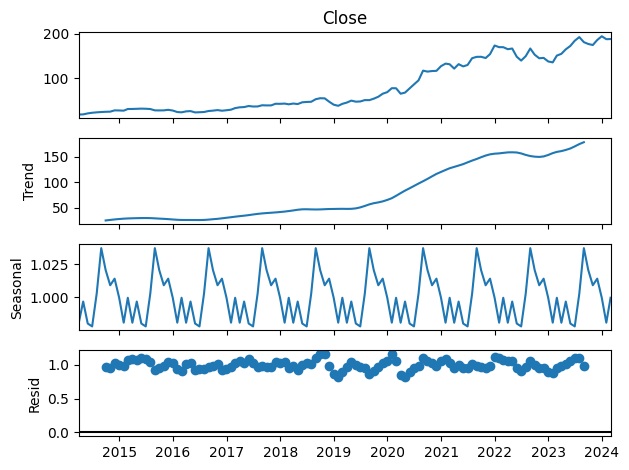

In [212]:
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(aapl_monthly_averages, model='multiplicative')
result.plot()
pyplot.show()

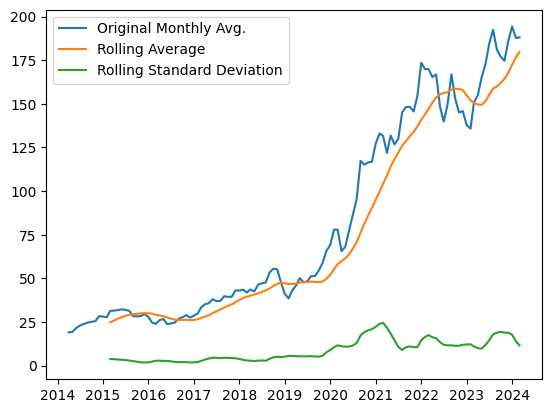

In [213]:
# Calculate rolling average and standard deviation (per year)
rolling_avg = aapl_monthly_averages.rolling(window=12).mean() 
rolling_std = aapl_monthly_averages.rolling(window=12).std()

# Plot original prices along with rolling average and standard deviation
plt.plot(aapl_monthly_averages, label='Original Monthly Avg.')
plt.plot(rolling_avg.index, rolling_avg, label='Rolling Average')
plt.plot(rolling_std.index, rolling_std, label='Rolling Standard Deviation')
plt.legend()
plt.show()

# The defined window "cuts" of course the time series, i.e. less will be displayed

In [214]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test to check stationarity for the monthly averages
result = adfuller(aapl_monthly_averages.dropna(), autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

print(f'\n\nAfter Differencing:')   
# If the p-value is greater than 0.05, we cannot reject the null hypothesis (the series is not stationary)
# Perform differencing to make the series stationary (default periods=1, i.e. t-1)
aapl_monthly_averages_diff = aapl_monthly_averages.diff(periods=1).dropna()

result_diff = adfuller(aapl_monthly_averages_diff.dropna(), autolag='AIC')
print('ADF Statistic: %f' % result_diff[0])
print('p-value: %f' % result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.558938
p-value: 0.986559
Critical Values:
	1%: -3.488
	5%: -2.887
	10%: -2.580


After Differencing:
ADF Statistic: -8.415722
p-value: 0.000000
Critical Values:
	1%: -3.488
	5%: -2.887
	10%: -2.580


Der p-value ist höher als das Signifikanz-Niveau 0.05 (p-value = 0.986559).  
Ergo wird die  Nullhypothese nicht abgelehnt -> Die Zeitreihe ist nicht-stationär.

Nach der Differenzierung ist der p-value sehr nahe bei 0.0

*Bemerkung zum ADF Test (vereinfacht):*

- *Leistung des Tests: Der ADF-Test erkennt möglicherweise nicht immer Nicht-Stationarität, insbesondere wenn die Time Series nahezu nicht-stationär ist.*
- *Stichprobengrösse: Die Genauigkeit des ADF-Tests kann davon abhängen, wie viele Datenpunkte in der Serie vorhanden sind.*
- *Wahl der Lags: Die Auswahl einer falschen Anzahl von Lags kann das Ergebnis des ADF-Tests beeinflussen.*
- *Strukturbrüche: Änderungen in der Serie können den ADF-Test unzuverlässig machen, weil er diese Änderungen nicht berücksichtigt.*
- *Art der Nicht-Stationarität: Der ADF-Test sucht nach einem spezifischen Grund für Nicht-Stationarität und könnte andere übersehen.*

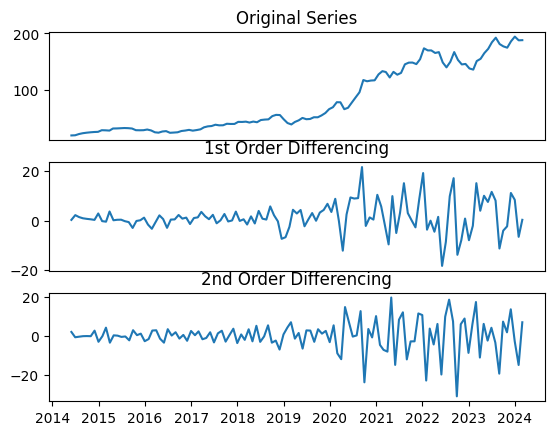

In [215]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
 
# Original Series
fig, (ax1, ax2, ax3) = plt.subplots(3)
ax1.plot(aapl_monthly_averages); ax1.set_title('Original Series'); ax1.axes.xaxis.set_visible(False)
# 1st Differencing
ax2.plot(aapl_monthly_averages.diff()); ax2.set_title('1st Order Differencing'); ax2.axes.xaxis.set_visible(False)
# 2nd Differencing
ax3.plot(aapl_monthly_averages.diff().diff()); ax3.set_title('2nd Order Differencing')
plt.show()

# Demonstrates effect of differencing:

<Axes: >

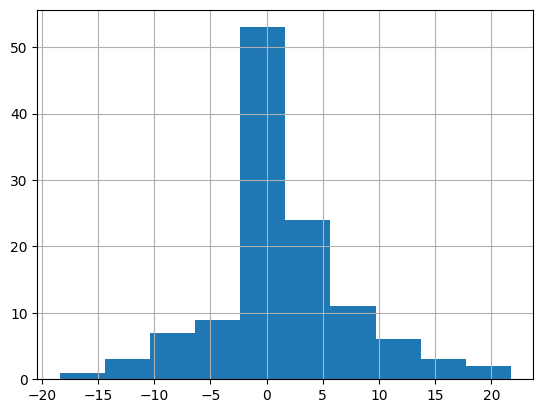

In [216]:
# Let's inspect the distribution
aapl_monthly_averages.diff().hist()

In [217]:
# Differencing seems to help to achieve stationarity, therefore let's keep this transformation
aapl_monthly_averages_diff = aapl_monthly_averages.diff().dropna()

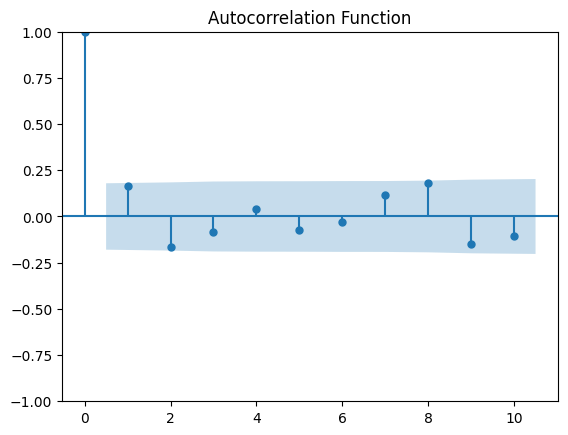

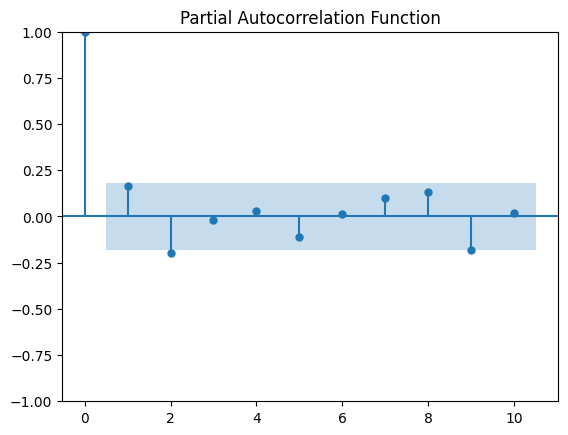

In [218]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot the Autocorrelation Function (ACF) 
plot_acf(aapl_monthly_averages_diff, lags=10)
plt.title('Autocorrelation Function')
plt.show()

# Plot the Partial Autocorrelation Function (PACF)
plot_pacf(aapl_monthly_averages_diff, lags=10)
plt.title('Partial Autocorrelation Function')
plt.show()

Ausgehend vom ACF-Plot, die die Korrelation der Reihe mit ihren eigenen Lags zeigt, suchen wir im Allgemeinen nach dem Punkt, an dem der ACF-Plot zum ersten Mal die obere Konfidenzgrenze unterschreitet. Wenn der ACF-Plot einen langsamen Abfall zeigt, deutet dies auf eine hohe AR-Prozes hin.

Der PACF-Plot, der die partielle Korrelation der Time Series mit den Lags ihrer selbst anzeigt und für die Werte der Reihe bei allen kürzeren Lags kontrolliert wird, ist der relevante Punkt, an dem der PACF-Plot zum 1. Mal die obere Konfidenzgrenze unterschreitet, um die Ordnung der **AR-Terme** zu bestimmen.

Betrachtet man den ACF-Plot, so scheint es keinen klaren Abschneidepunkt zu geben, was darauf hindeutet, dass die Reihe möglicherweise keine signifikante MA-Komponente enthält (oder dass die MA-Komponente von höherer Ordnung ist, die innerhalb der ersten 10 Lags nicht deutlich sichtbar ist). Die PACF-Darstellung hingegen weist eine signifikante Spitze bei Verzögerung 1 auf, was azf  ein AR(1)-Modell deutet.

Ergo: ARIMA(1,1,0) bzw. ARIMA(p=1, d=1, q=0)

In [219]:
from statsmodels.tsa.arima.model import ARIMA

# Build the ARIMA model
model = ARIMA(aapl_monthly_averages, order=(1,1,0))  # Choosed based on ACF and PACF analysis + differencing before
model_fit = model.fit()

# Display the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  120
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -384.175
Date:                Fri, 16 Feb 2024   AIC                            772.350
Time:                        22:01:01   BIC                            777.908
Sample:                    03-31-2014   HQIC                           774.607
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2078      0.066      3.127      0.002       0.078       0.338
sigma2        37.2803      3.433     10.859      0.000      30.552      44.009
Ljung-Box (L1) (Q):                   0.00   Jarque-

- Koeffizient ar.L1 (0,2078) mit  p-Wert von 0.002 deutet darauf hin, dass der AR-Term statistisch signifikant ist, da der p-Wert unter dem typischen Alpha-Niveau von 0.05 liegt, Indiz das eine Beziehung zwischen dem aktuellen Wert der Reihe und ihrem vorherigen Wert existiert.

- Log Likelihood ist -384,175, der AIC ist 772,350 und der BIC ist 777,908. AIC und BIC werden u.a. zum Modellvergleich herangezogen; niedrigere Werte sind im Allgemeinen besser und weisen auf ein gutes Gleichgewicht zwischen Fit / Komplexität hin.

- Ljung-Box-Test (Prob(Q)) hat einen p-Wert von 1,00, was bedeutet, dass die Residuen unabhängig verteilt sind (keine Autokorrelation).

- Jarque-Bera-Test (Prob(JB)) hat einen p-Wert von 0,00, was darauf hindeutet, dass die Residuen nicht normalverteilt sind, was bedenklich sein kann, da es eine der Annahmen von ARIMA-Modellen verletzt. Dies könnte auf Ausreisser, Skewness oder eine grosse Anzahl von Beobachtungen in den "Tailes" der Distribution zurückzuführen sein.

- Heteroskedastizitätstest (Prob(H)) hat einen p-Wert von 0,00, die Residuen könnten heteroskedastisch sein, was bedeutet, dass sich die Varianz der Residuen im Laufe der Zeit ändern könnte. Dies könnte bedeuten, dass z.B. ein GARCH-Modell zur Modellierung der bedingten Varianz oder durch die Einbeziehung exogener Variablen bessere Resultate liefert.

<Axes: >

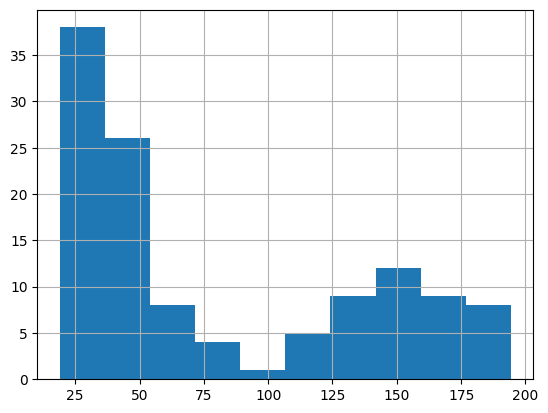

In [220]:
# Let's inspect the distribution
aapl_monthly_averages.hist()

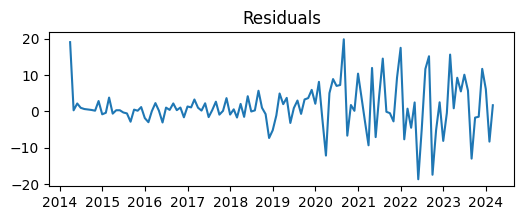

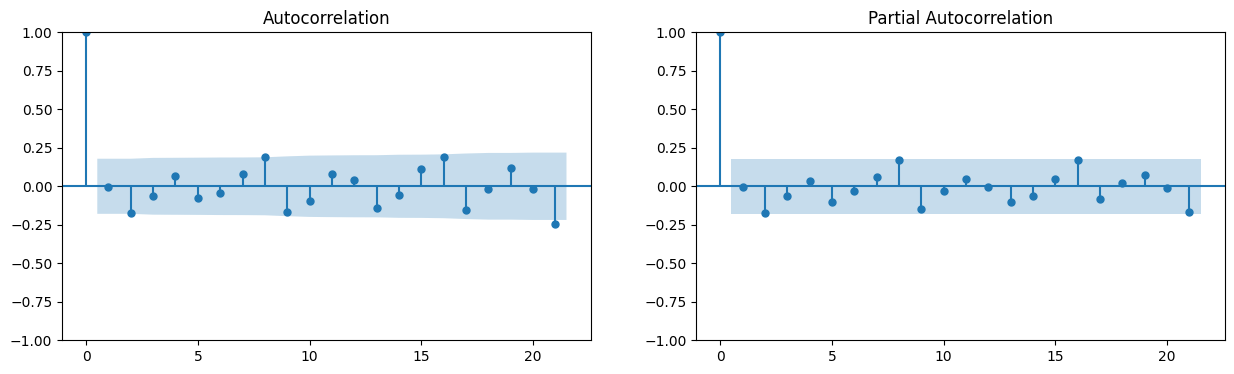

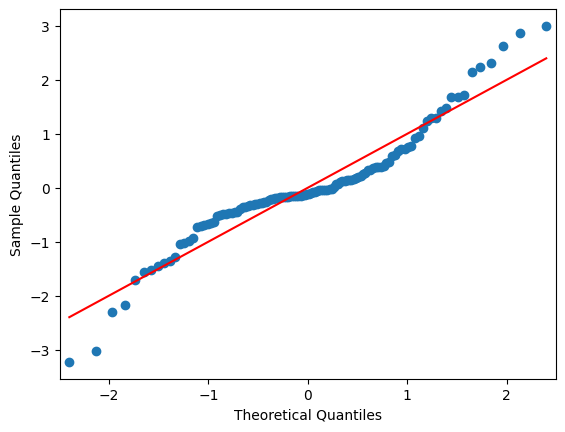

In [221]:
# Diagnostic plots for the ARIMA model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.gofplots import qqplot

# Assuming 'model_fit' is the fitted ARIMA model's results object
residuals = model_fit.resid

# Plot the residuals
plt.figure(figsize=(6, 2))
plt.plot(residuals)
plt.title('Residuals')
plt.show()

# Plot the ACF and PACF of residuals
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
plot_acf(residuals, ax=ax[0])
plot_pacf(residuals, ax=ax[1])
plt.show()

# QQ plot of the residuals
qqplot(residuals, line='s', fit=True)
plt.show()

- Residuals:Die Residuals im Zeitverlauf zeigen keine offensichtlichen Muster oder Trends, was ein Indiz ist, dass das Modell die Struktur der Daten gut abbildet. Wenn das Modell für die Daten geeignet ist, sollten die Residuals keine offensichtliche Struktur (Trend/Sainsalität) mehr zeigen.

- ACF und PACF der Residuals: ACF und PACF der Residuals deuten darauf hin, dass bei keinem Lag eine signifikante Autokorrelation vorliegt. Alle Punkte liegen innerhalb des blau schattierten Bereichs , der die Konfidenzintervalle darstellt. Wären die Residuals autokorreliert, würden wir Ausschläge ausserhalb des blauen Bereichs erwarten. Dies deutet darauf hin, dass das ARIMA(1,1,0)Modell die Autokorrelation in den Daten angemessen erfasst hat.

- QQ-Plot: Vergleicht die Quantile der Residuals mit den theoreteischen Quantilen einer Normalverteilung. Bei einer kompletten Normalverteilung würden die Punkte genau auf die rote Linie fallen. Die mittleren Quantile zwar grob mit der Linie übereinstimmen, was auf Normalverteilung im zentralen Teil der Verteilung hindeutet, die "Tails" jedoch von der Linie abweichen, insbesondere der untere Tail. Dies deutet darauf hin, dass die Residuals stärkere Tails haben als die Normalverteilung, was ein Zeichen für Kurtosis oder Outliers ist.

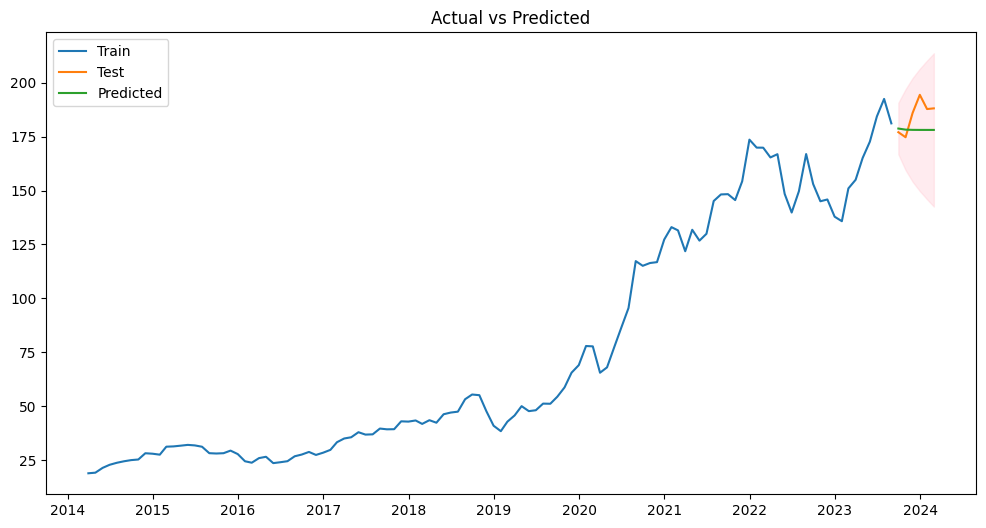

In [222]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

train_size = int(len(aapl_monthly_averages) * 0.95)  # for example, 90% train, 10% test
train, test = aapl_monthly_averages[0:train_size], aapl_monthly_averages[train_size:]

# Build and fit the ARIMA model on the training data
model = ARIMA(train, order=(1,1,0))
model_fit = model.fit()

# Forecast the next steps ahead in the future equal to the test set size
forecast = model_fit.get_forecast(steps=len(test))

# The forecast object contains the predicted values
forecast_values = forecast.predicted_mean

# The confidence intervals
conf_int = forecast.conf_int()

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast_values, label='Predicted')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

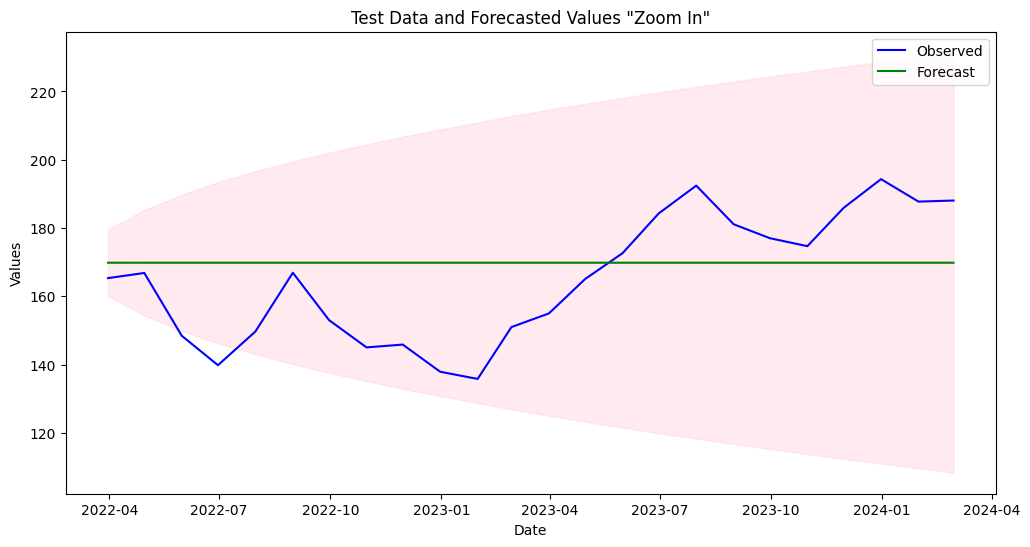

In [223]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

train_size = int(len(aapl_monthly_averages) * 0.80)  # for example, 95% train, 5% test
train, test = aapl_monthly_averages[0:train_size], aapl_monthly_averages[train_size:]

# Build and fit the ARIMA model on the training data
model = ARIMA(train, order=(1,1,0))
model_fit = model.fit()

# Forecast the next steps ahead in the future equal to the test set size
forecast = model_fit.get_forecast(steps=len(test))
# The forecast object contains the predicted values
forecast_values = forecast.predicted_mean
# The confidence intervals
conf_int = forecast.conf_int()

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
# Plot the observed values
plt.plot(test.index, test, label='Observed', color='blue')

# Plot the predicted values
plt.plot(test.index, forecast_values, label='Forecast', color='green')

# Plot the confidence intervals
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)

plt.title('Test Data and Forecasted Values "Zoom In"')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


In [224]:
# Let's test it with Auto ARIMA
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

# Use pmdarima to automatically select best ARIMA model
auto_arima_model = auto_arima(y=aapl_monthly_averages,
                    m = 12,                # Season frequency, i.e. m is 4 for quarterly data, 12 for monthly data, or 1 for annual (non-seasonal) data 
                    seasonal = False,     # TRUE if seasonal series
                    test = 'adf',         # Use adftest to find optimal 'd'
                    start_p = 0, start_q = 0, # Minimum p and q
                    max_p = 12, max_q = 12, # Maximum p and q
                    trace = True,
                    information_criterion = 'aic',
                    error_action = 'ignore',  
                    suppress_warnings = True, 
                    stepwise = True)
# Print model summary
auto_arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=771.329, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=770.023, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=768.419, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=775.649, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=769.647, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=768.652, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=769.746, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=770.683, Time=0.01 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.154 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -381.209
Date:                Fri, 16 Feb 2024   AIC                            768.419
Time:                        22:01:14   BIC                            776.756
Sample:                    03-31-2014   HQIC                           771.804
                         - 02-29-2024                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4195      0.739      1.922      0.055      -0.028       2.867
ma.L1          0.2348      0.083      2.830      0.005       0.072       0.397
sigma2        35.4643      3.216     11.029      0.000      29.162      41.767
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                21.84
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):              25.59   Skew:                             0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.10
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Ganzer Output erklärt:
https://medium.com/@sachinnayak18/reading-arima-results-35eb1df7a565

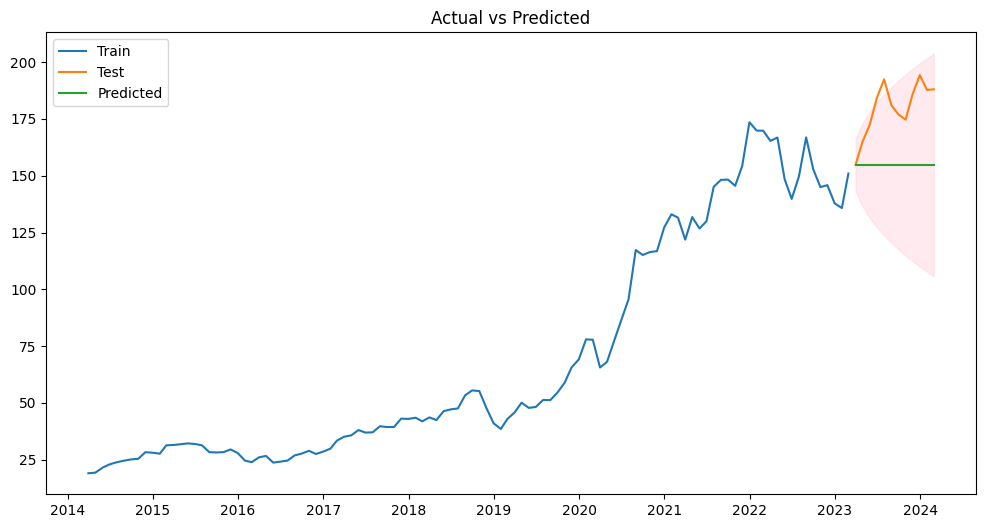

In [225]:
train_size = int(len(aapl_monthly_averages) * 0.95)  # for example, 90% train, 10% test
train, test = aapl_monthly_averages[0:train_size], aapl_monthly_averages[train_size:]

# Build and fit the ARIMA model on the training data
model = ARIMA(train, order=(0,1,1))
model_fit = model.fit()

# Forecast the next steps ahead in the future equal to the test set size
forecast = model_fit.get_forecast(steps=len(test))

# The forecast object contains the predicted values
forecast_values = forecast.predicted_mean

# The confidence intervals
conf_int = forecast.conf_int()

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast_values, label='Predicted')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [253]:
# Get the actual values
forecast_values

2023-03-31    154.747587
2023-04-30    154.747587
2023-05-31    154.747587
2023-06-30    154.747587
2023-07-31    154.747587
2023-08-31    154.747587
2023-09-30    154.747587
2023-10-31    154.747587
2023-11-30    154.747587
2023-12-31    154.747587
2024-01-31    154.747587
2024-02-29    154.747587
Freq: M, Name: predicted_mean, dtype: float64

The Mean Squared Error of forecasts is 39.53951131551731


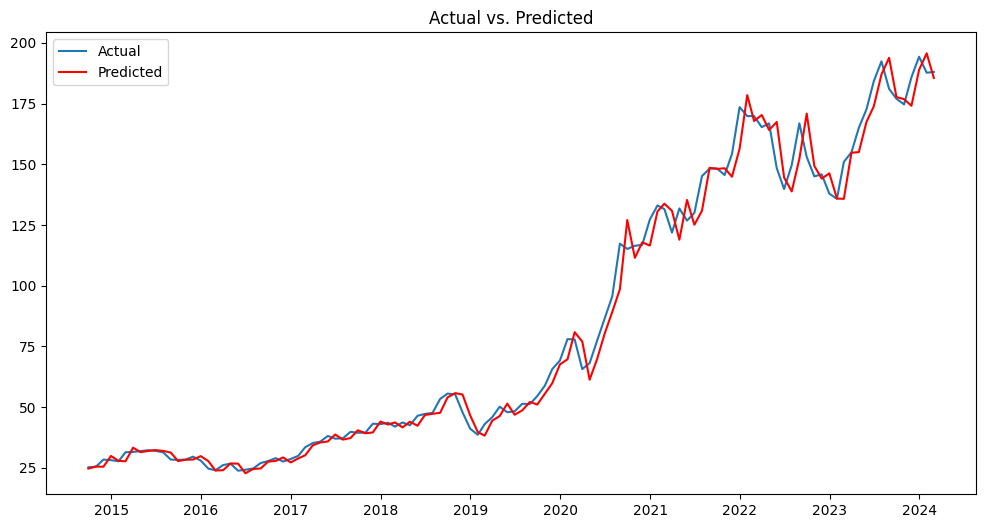

In [277]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pandas as pd

train_size = int(len(aapl_monthly_averages) * 0.05)  # e.g. 95% train, 5% test
train, test = aapl_monthly_averages[0:train_size], aapl_monthly_averages[train_size:]

# Now a "waling prediction", therefore indlude "yesterday"
history = train.copy()
predictions = []
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    # Update the history with the actual test value for the next loop
    history = pd.concat([history, pd.Series([test.iloc[t]], index=[test.index[t]])])

# Calculate MSE
mse = mean_squared_error(test, predictions)
print(f'The Mean Squared Error of forecasts is {mse}')

# Plot the actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()